In [1]:
#import all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing
import numpy.random as nr
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model, svm
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import scipy.stats as ss


%matplotlib inline

In [2]:
#import the data
medical_costs = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\insurance.csv")

In [3]:
#explore the data
medical_costs.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#convert float to integers
#medical_costs = medical_costs.astype({"bmi":'int', "charges":'int'}) 

In [5]:
medical_costs.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
medical_costs.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#print out the statistics
medical_costs.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


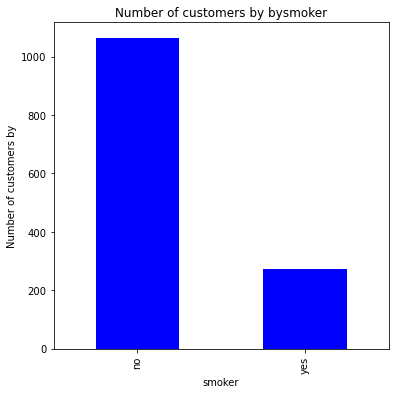

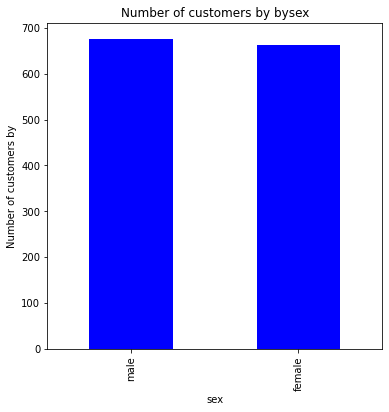

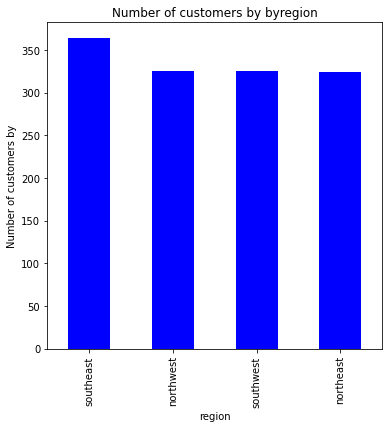

In [8]:
#plot a bar graph for categorical variables
#plot a bar chart for categorical variables
def plot_bars(medical_costs, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = medical_costs[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers by')# Set text for y axis
        plt.show()

plot_cols = ['smoker',
             'sex', 'region'
             ]
plot_bars(medical_costs, plot_cols)  


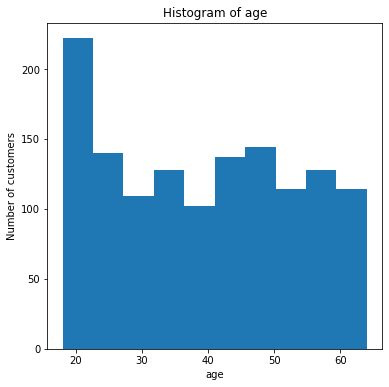

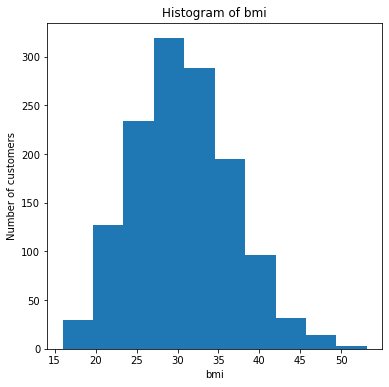

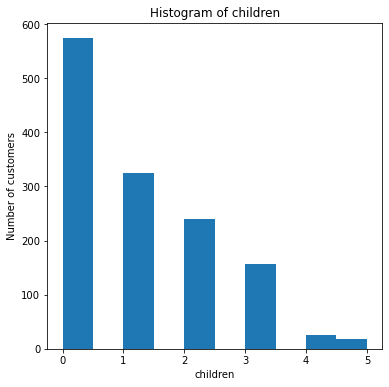

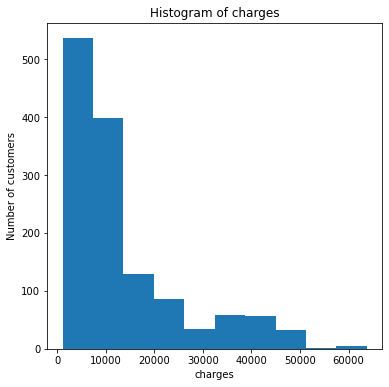

In [9]:
#use of histograms
def plot_histogram(medical_costs, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        medical_costs[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['age', 'bmi',
            'children', 'charges'
            ]    
plot_histogram(medical_costs, num_cols)

In [10]:
medical_costs.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


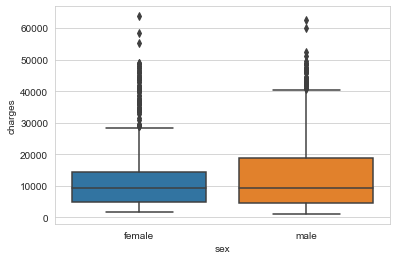

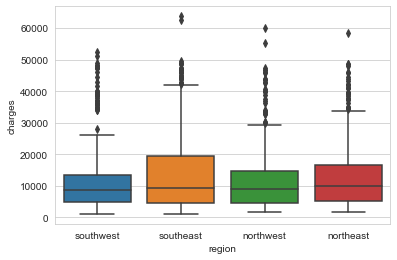

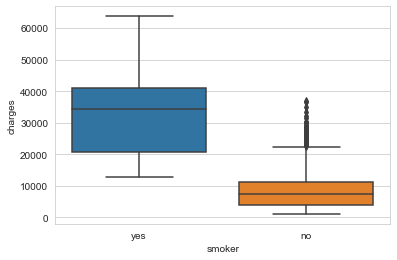

In [11]:
#relationship between categorical and numerical features
def plot_box(medical_costs, cols, col_y = 'charges'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=medical_costs)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['sex', 'region', 'smoker'
             
            ]
plot_box(medical_costs, cat_cols) 

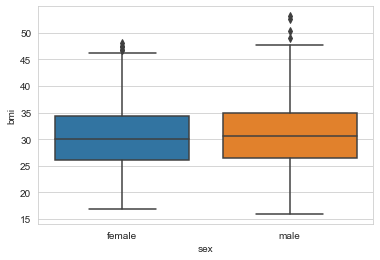

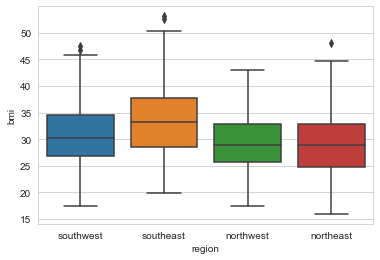

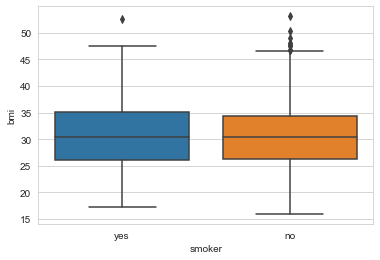

In [12]:
#relationship between categorical and numerical features
def plot_box(medical_costs, cols, col_y = 'bmi'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=medical_costs)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['sex', 'region', 'smoker'
             
            ]
plot_box(medical_costs, cat_cols) 

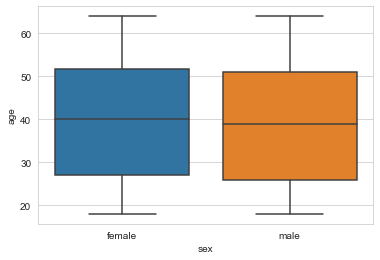

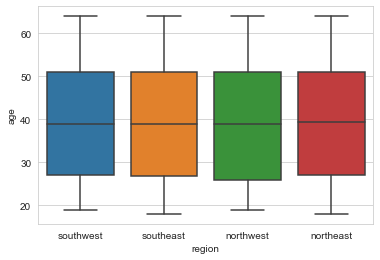

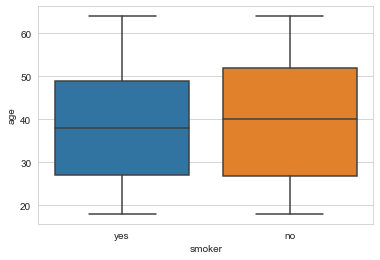

In [13]:
#relationship between categorical and numerical features
def plot_box(medical_costs, cols, col_y = 'age'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=medical_costs)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['sex', 'region', 'smoker'
             
            ]
plot_box(medical_costs, cat_cols)

In [14]:
#DATA PREPARATION FOR MACHINE LEARNING

In [15]:
medical_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
#aggregating categorical columns
#examine the number for region
medical_costs['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [17]:
#aggregating categorical columns
#examine the number for sex
medical_costs['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
#aggregating categorical columns
#examine the number for smoker
medical_costs['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
#transforming numeric variables

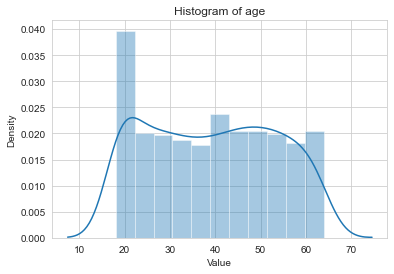

In [20]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(medical_costs['age'], 'age')

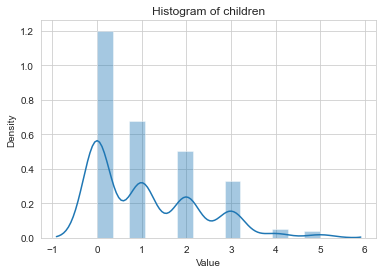

In [21]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(medical_costs['children'], 'children')

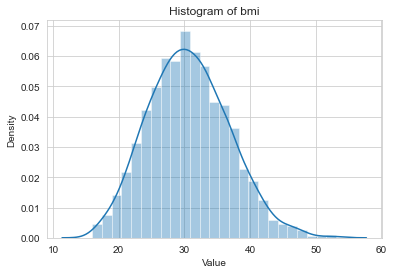

In [22]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(medical_costs['bmi'], 'bmi')

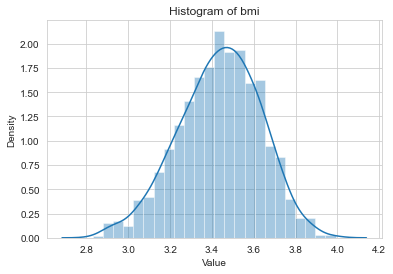

In [23]:
#log all numeric features
medical_costs['log1p_age'] = np.log1p(medical_costs['age'])
medical_costs['log1p_bmi'] = np.log1p(medical_costs['bmi'])
medical_costs['log_charges'] = np.log1p(medical_costs['charges'])
medical_costs['log1p_children'] = np.log1p(medical_costs['children'])
hist_plot(medical_costs['log1p_bmi'], 'bmi')



In [24]:
#check for any missing rowns
(medical_costs.astype(np.object) == 999).any()

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
log1p_age         False
log1p_bmi         False
log_charges       False
log1p_children    False
dtype: bool

In [25]:
medical_costs.head(5)

,age,sex,bmi,children,smoker,region,charges,log1p_age,log1p_bmi,log_charges,log1p_children
0,19,female,27.900,0,yes,southwest,16884.92400,2.995732,3.363842,9.734236,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,2.944439,3.548755,7.453882,0.693147
2,28,male,33.000,3,no,southeast,4449.46200,3.367296,3.526361,8.400763,1.386294
3,33,male,22.705,0,no,northwest,21984.47061,3.526361,3.165686,9.998137,0.000000
4,32,male,28.880,0,no,northwest,3866.85520,3.496508,3.397189,8.260455,0.000000


In [26]:
#print out the data types
medical_costs.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
log1p_age         float64
log1p_bmi         float64
log_charges       float64
log1p_children    float64
dtype: object

In [27]:
print(medical_costs['region'].unique())
Features = medical_costs['region']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['southwest' 'southeast' 'northwest' 'northeast']
[3 2 2 ... 2 3 1]


In [28]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [29]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['sex', 'smoker']

for col in categorical_columns:
    temp = encode_string(medical_costs[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(1338, 8)
[[0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0.]]


In [30]:
#concatenate numeric features
Features = np.concatenate([Features, np.array(medical_costs[[ 'log1p_age', 'log1p_children','log1p_bmi']])], axis = 1)

Features[:2,:]

array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 2.99573227, 0.        ,
        3.3638416 ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 2.94443898, 0.69314718,
        3.54875495]])

In [31]:
#print out the data table
medical_costs.head(4)

,age,sex,bmi,children,smoker,region,charges,log1p_age,log1p_bmi,log_charges,log1p_children
0,19,female,27.900,0,yes,southwest,16884.92400,2.995732,3.363842,9.734236,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,2.944439,3.548755,7.453882,0.693147
2,28,male,33.000,3,no,southeast,4449.46200,3.367296,3.526361,8.400763,1.386294
3,33,male,22.705,0,no,northwest,21984.47061,3.526361,3.165686,9.998137,0.000000


In [32]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(medical_costs['log_charges'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
print(Features.shape)

(1338, 11)


In [33]:
scaler = preprocessing.StandardScaler().fit(X_train[:,8:]) #we have 8 features here
X_train[:,8:] = scaler.transform(X_train[:,8:])
X_test[:,8:] = scaler.transform(X_test[:,8:])

In [34]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [35]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[2.00571671 1.9508535  1.8488815  1.83898156 3.85012532 3.79430795
 3.05877274 4.58566053 0.47763423 0.11249726 0.0803921 ]


In [36]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.14936557998402217
Root Mean Square Error = 0.3864784340477773
Mean Absolute Error    = 0.2570252663571113
Median Absolute Error  = 0.16011558250822944
R^2                    = 0.8118647337016781
Adjusted R^2           = 0.7982827759742591


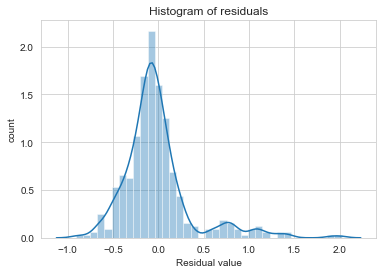

In [37]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

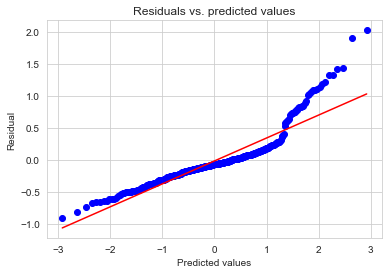

In [38]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score) 